In [203]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Investigating `InjuryRecord.csv`

In [169]:
# read injuries record
inj = pd.read_csv('../data_planB/nfl-playing-surface-analytics/InjuryRecord.csv')

inj.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


In [170]:
inj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PlayerKey  105 non-null    int64 
 1   GameID     105 non-null    object
 2   PlayKey    77 non-null     object
 3   BodyPart   105 non-null    object
 4   Surface    105 non-null    object
 5   DM_M1      105 non-null    int64 
 6   DM_M7      105 non-null    int64 
 7   DM_M28     105 non-null    int64 
 8   DM_M42     105 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 7.5+ KB


In [171]:
inj.isna().sum()
# 28 play keys missing --> I want to merge on PlayKey, so if missing might have to drop

PlayerKey     0
GameID        0
PlayKey      28
BodyPart      0
Surface       0
DM_M1         0
DM_M7         0
DM_M28        0
DM_M42        0
dtype: int64

In [172]:
inj[inj['PlayKey'].isna()]

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
46,33337,33337-2,NaN,Foot,Natural,1,1,1,1
47,45099,45099-5,NaN,Knee,Natural,1,1,1,1
48,36591,36591-9,NaN,Knee,Natural,1,1,1,1
49,45950,45950-6,NaN,Toes,Synthetic,1,1,0,0
50,39653,39653-4,NaN,Ankle,Synthetic,1,0,0,0
51,38253,38253-10,NaN,Toes,Synthetic,1,1,1,0
52,38214,38214-12,NaN,Toes,Synthetic,1,0,0,0
53,43119,43119-12,NaN,Ankle,Synthetic,1,0,0,0
54,35648,35648-12,NaN,Ankle,Natural,1,0,0,0
55,40051,40051-13,NaN,Ankle,Natural,1,0,0,0


In [173]:
# let's add a col for 'severe' injury --> 1 if DM_42, else 0
inj['Severe'] = inj['DM_M42'].map({1: 1, 0: 0})

In [174]:
inj.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,Severe
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1,1


---
### 2. Investigating `PlayList.csv`

In [175]:
plays = pd.read_csv('../data_planB/nfl-playing-surface-analytics/PlayList.csv')

plays.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


In [176]:
plays.shape

(267005, 14)

In [177]:
plays.isna().sum()

PlayerKey             0
GameID                0
PlayKey               0
RosterPosition        0
PlayerDay             0
PlayerGame            0
StadiumType       16910
FieldType             0
Temperature           0
Weather           18691
PlayType            367
PlayerGamePlay        0
Position              0
PositionGroup         0
dtype: int64

- `RosterPosition` in this dataset implies the player's overraching role
- `Position` is the player's specific position ***during*** the play
- `PositionGroup` is slightly more general

Let's remove `RosterPosition` and `Position`

In [178]:
plays.drop(['RosterPosition', 'Position'], axis = 1, inplace = True)

plays.head()

,PlayerKey,GameID,PlayKey,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,PositionGroup
0,26624,26624-1,26624-1-1,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB
1,26624,26624-1,26624-1-2,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB
2,26624,26624-1,26624-1-3,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB
3,26624,26624-1,26624-1-4,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB
4,26624,26624-1,26624-1-5,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB


--- 
### 3. Merging the DFs and Exploring

#### 3a. Merging on `PlayKey`

In [179]:
df1 = pd.merge(inj[inj['PlayKey'].isna() == False], plays, how = 'left', left_on = 'PlayKey', right_on = 'PlayKey')

In [180]:
df1.columns

Index(['PlayerKey_x', 'GameID_x', 'PlayKey', 'BodyPart', 'Surface', 'DM_M1',
       'DM_M7', 'DM_M28', 'DM_M42', 'Severe', 'PlayerKey_y', 'GameID_y',
       'PlayerDay', 'PlayerGame', 'StadiumType', 'FieldType', 'Temperature',
       'Weather', 'PlayType', 'PlayerGamePlay', 'PositionGroup'],
      dtype='object')

In [181]:
df1

,PlayerKey_x,GameID_x,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,Severe,...,GameID_y,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,PositionGroup
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,1,...,39873-4,29,4,Indoors,Synthetic,84,Cloudy,Punt,32,LB
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,0,...,46074-7,50,7,Open,Natural,76,Partly Cloudy,Punt,26,LB
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1,1,...,36557-1,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,70,DB
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0,0,...,46646-3,15,3,Outdoor,Natural,80,Cloudy,Punt,30,LB
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1,1,...,43532-5,32,5,Retractable Roof,Synthetic,89,Partly Cloudy,Kickoff,69,WR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,42418,42418-19,42418-19-15,Ankle,Synthetic,1,0,0,0,0,...,42418-19,442,19,Retr. Roof - Closed,Synthetic,57,Mostly cloudy,Rush,15,OL
73,46394,46394-18,46394-18-3,Knee,Synthetic,1,1,0,0,0,...,46394-18,393,18,Outdoor,Synthetic,45,Cloudy,Kickoff Returned,3,TE
74,45187,45187-9,45187-9-4,Ankle,Natural,1,0,0,0,0,...,45187-9,327,9,Outdoor,Natural,81,Cloudy,Rush,4,WR
75,42448,42448-14,42448-14-3,Knee,Synthetic,1,1,1,0,0,...,42448-14,379,14,Retractable Roof,Synthetic,78,Partly Cloudy,Pass,3,WR


In [182]:
df1.columns

Index(['PlayerKey_x', 'GameID_x', 'PlayKey', 'BodyPart', 'Surface', 'DM_M1',
       'DM_M7', 'DM_M28', 'DM_M42', 'Severe', 'PlayerKey_y', 'GameID_y',
       'PlayerDay', 'PlayerGame', 'StadiumType', 'FieldType', 'Temperature',
       'Weather', 'PlayType', 'PlayerGamePlay', 'PositionGroup'],
      dtype='object')

In [183]:
df1.drop(['GameID_y', 'PlayerKey_y',], axis = 1, inplace = True)

In [184]:
df1.rename({'PlayerKey_x': 'PlayerKey', 'GameID_x': 'GameID'}, axis = 1, inplace = True)

In [185]:
df1.columns

Index(['PlayerKey', 'GameID', 'PlayKey', 'BodyPart', 'Surface', 'DM_M1',
       'DM_M7', 'DM_M28', 'DM_M42', 'Severe', 'PlayerDay', 'PlayerGame',
       'StadiumType', 'FieldType', 'Temperature', 'Weather', 'PlayType',
       'PlayerGamePlay', 'PositionGroup'],
      dtype='object')

---
#### 3b. Merging Separately for Missing `PlayKey`s

In [186]:
df2 = pd.merge(inj[inj['PlayKey'].isna()], plays, left_on = 'GameID', right_on = 'GameID', how = 'left')

In [187]:
df2.drop_duplicates('GameID', inplace = True)

In [188]:
df2.columns

Index(['PlayerKey_x', 'GameID', 'PlayKey_x', 'BodyPart', 'Surface', 'DM_M1',
       'DM_M7', 'DM_M28', 'DM_M42', 'Severe', 'PlayerKey_y', 'PlayKey_y',
       'PlayerDay', 'PlayerGame', 'StadiumType', 'FieldType', 'Temperature',
       'Weather', 'PlayType', 'PlayerGamePlay', 'PositionGroup'],
      dtype='object')

In [189]:
df2.drop(['PlayKey_x', 'PlayerKey_y',], axis = 1, inplace = True)

In [190]:
df2.rename({'PlayerKey_x': 'PlayerKey', 'PlayKey_y': 'PlayKey'}, axis = 1, inplace = True)

In [191]:
# viewing the df so I can re-order
df2.head(1)

,PlayerKey,GameID,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,Severe,PlayKey,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,PositionGroup
0,33337,33337-2,Foot,Natural,1,1,1,1,1,33337-2-1,8,2,Outdoors,Natural,83,Sunny,Rush,1,TE


In [192]:
list(df2.columns)

['PlayerKey',
 'GameID',
 'BodyPart',
 'Surface',
 'DM_M1',
 'DM_M7',
 'DM_M28',
 'DM_M42',
 'Severe',
 'PlayKey',
 'PlayerDay',
 'PlayerGame',
 'StadiumType',
 'FieldType',
 'Temperature',
 'Weather',
 'PlayType',
 'PlayerGamePlay',
 'PositionGroup']

In [194]:
df2 = df2[['PlayerKey',
 'GameID',
 'PlayKey',
 'BodyPart',
 'Surface',
 'DM_M1',
 'DM_M7',
 'DM_M28',
 'DM_M42',
 'Severe',
 'PlayerDay',
 'PlayerGame',
 'StadiumType',
 'FieldType',
 'Temperature',
 'Weather',
 'PlayType',
 'PlayerGamePlay',
 'PositionGroup']]

df2.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,Severe,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,PositionGroup
0,33337,33337-2,33337-2-1,Foot,Natural,1,1,1,1,1,8,2,Outdoors,Natural,83,Sunny,Rush,1,TE
25,45099,45099-5,45099-5-1,Knee,Natural,1,1,1,1,1,29,5,Outdoor,Natural,72,Sunny,Kickoff,1,DB
26,36591,36591-9,36591-9-1,Knee,Natural,1,1,1,1,1,64,9,Open,Natural,76,Partly Cloudy,Kickoff,1,WR
30,45950,45950-6,45950-6-1,Toes,Synthetic,1,1,0,0,0,36,6,Retractable Roof,Synthetic,85,Partly Cloudy,Pass,1,DB
111,39653,39653-4,39653-4-1,Ankle,Synthetic,1,0,0,0,0,25,4,Outdoor,Synthetic,61,Sunny,Rush,1,DB


---
#### 3c. Concatenating both Cleaned DFs Together

In [195]:
all_inj = pd.concat([df1, df2], axis = 0)

In [196]:
all_inj.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,Severe,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,PositionGroup
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,1,29,4,Indoors,Synthetic,84,Cloudy,Punt,32,LB
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,0,50,7,Open,Natural,76,Partly Cloudy,Punt,26,LB
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1,1,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,70,DB
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0,0,15,3,Outdoor,Natural,80,Cloudy,Punt,30,LB
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1,1,32,5,Retractable Roof,Synthetic,89,Partly Cloudy,Kickoff,69,WR


This cleaned and merged dataset is ALL injuries and information for what what play/game the injury occurred. Now, we can do EDA on this dataset since we have more information regarding the circumstances revolving around each of the injuries such as stadium type, field type, temperature, etc.

---
### 4. EDA & Visualizations

In [231]:
pd.DataFrame(all_inj.groupby('Surface')['BodyPart'].count())

,BodyPart
Surface,
Natural,48
Synthetic,57


Of all injuries in our dataset, 57 of them occurred on Synthetic playing surfaces (turf).

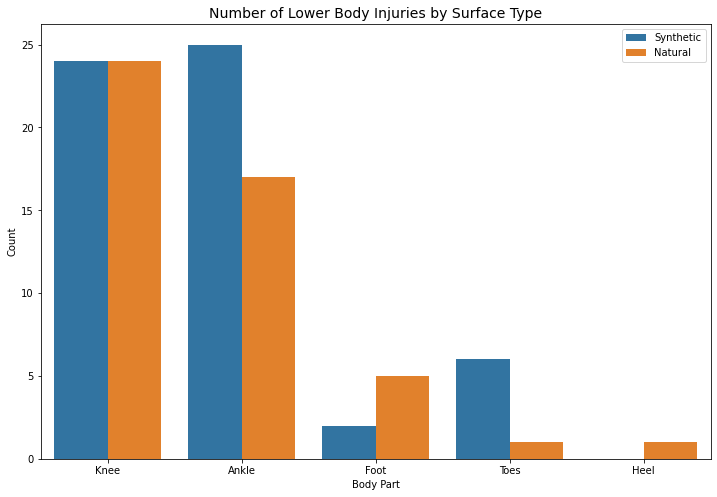

In [236]:
# graphing injury count by surface type
plt.figure(figsize = (12,8))
sns.countplot(data = all_inj, x = 'BodyPart', hue = 'Surface')
plt.title("Number of Lower Body Injuries by Surface Type", size = 14)
plt.ylabel("Count", size = 10)
plt.xlabel("Body Part", size = 10)
plt.legend(loc = 'upper right')

plt.savefig('./inj_by_surface.jpeg', dpi = 1080);

Let's also look at the count of **severe** injuries and body part.

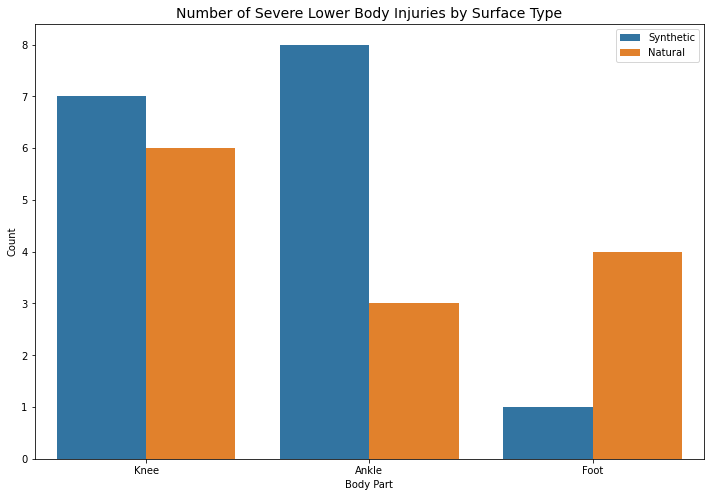

In [238]:
# same graph as above, but showing only for 'severe' injuries (where players miss more than 42 days or 6 weeks)
plt.figure(figsize = (12,8))
sns.countplot(data = all_inj[all_inj['Severe'] == 1], x = 'BodyPart', hue = 'Surface')
plt.title("Number of Severe Lower Body Injuries by Surface Type", size = 14)
plt.ylabel("Count", size = 10)
plt.xlabel("Body Part", size = 10)
plt.legend(loc = 'upper right')

plt.savefig('./severe_inj_by_surface.jpeg', dpi = 1080);

This lends support to the fact that Synthetic surfaces may be closely linked to higher prevalence of lower body injury, specifically for knees and ankles. There are more foot injuries on Natural surfaces, but the overall number is relatively low. If Synthetic surfaces are indeed having a negative affect on knees and ankles, perhaps more injuries are happening on these surfaces for players in positions that ***run more***, or cover more ground per play/game.

We hypothesize that positions that cover more ground and require more running are injured in the lower body at a greater frequency, and this is exacerbated by playing on synthetic surfaces.

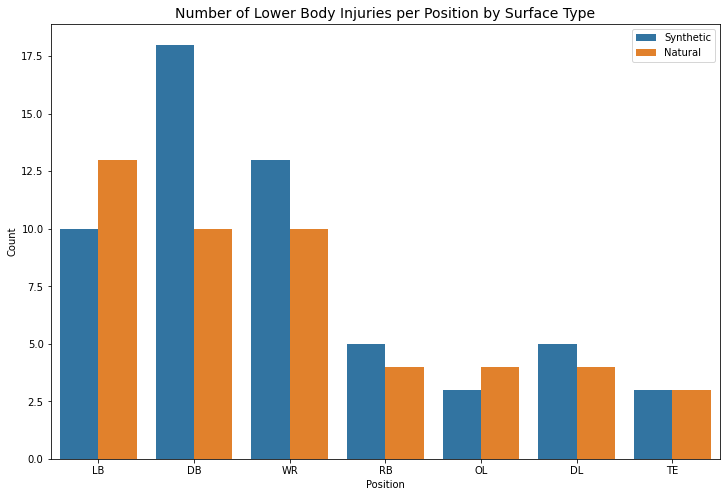

In [250]:
# graphing injury occurrence by position
plt.figure(figsize = (12,8))
sns.countplot(data = all_inj, x = 'PositionGroup', hue = 'Surface')
plt.title("Number of Lower Body Injuries per Position by Surface Type", size = 14)
plt.ylabel("Count", size = 10)
plt.xlabel("Position", size = 10)
plt.legend(loc = 'upper right')

plt.savefig('./inj_position_surface.jpeg', dpi = 1080);

The above visual lends support to our hypothesize above. It looks like players in positions that require more running and field coverage in the midfield of a play are getting injured at a higher frequency on Synthetic surfaces. For example, Defensive Backs (DBs), Wide Receivers (WRs), and Running Backs (RBs) are all positions that require running and acceleration and injuries are more frequent for them in knees and ankles. Since running requires more strain on the lower body, it would make sense that these are the body parts getting injured at a higher frequency.

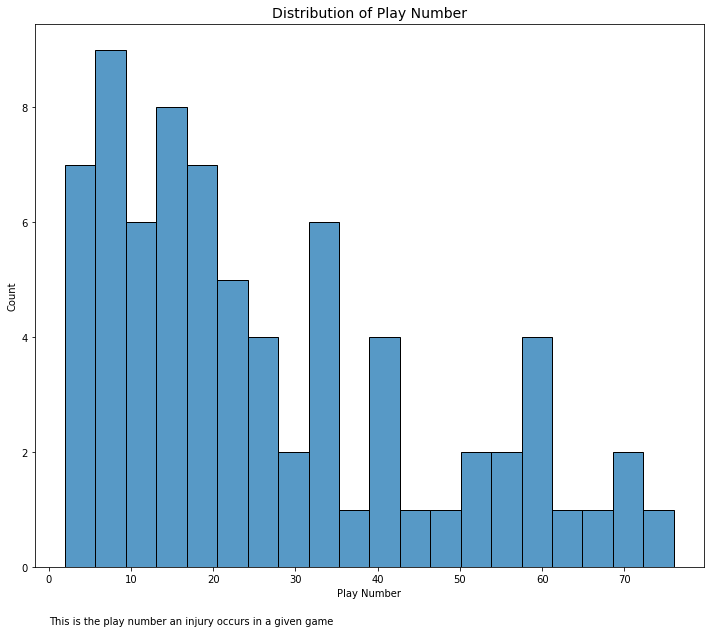

In [262]:
# distribution of PlayerGamePlay
plt.figure(figsize = (12,10))
plt.title("Distribution of Play Number", size = 14)
sns.histplot(data = all_inj, x = all_inj[all_inj['PlayerGamePlay'] >1]['PlayerGamePlay'], bins = 20)
plt.xlabel("Play Number")
plt.text(0.05,-1,'This is the play number an injury occurs in a given game')

plt.savefig('./distribution_play_num.jpeg', dpi = 1080);

### Notes for Jack if you want to work on the below:

In [263]:
##### create some visual that shows any distinctions between injury (if any) in play type (pass, rush, punt, etc.)

In [265]:
# potential model to predict severity:

# just listing the features I had in mind, but a majority of these need to be dummified, also 'surface' and 'field type' are the same (I think)
# Stadium type and weather likely will have pretty low importance, so they may not need to be included --> i was planning to do a quick correlation before 
    # electing to include them or not
features = [
 'BodyPart',
 'Surface',
 'PlayerDay',
 'PlayerGame',
 'StadiumType',
 'Temperature',
 'Weather',
 'PlayType',
 'PlayerGamePlay',
 'PositionGroup']

target = ['Severe']

list(all_inj.columns)

['PlayerKey',
 'GameID',
 'PlayKey',
 'BodyPart',
 'Surface',
 'DM_M1',
 'DM_M7',
 'DM_M28',
 'DM_M42',
 'Severe',
 'PlayerDay',
 'PlayerGame',
 'StadiumType',
 'FieldType',
 'Temperature',
 'Weather',
 'PlayType',
 'PlayerGamePlay',
 'PositionGroup']